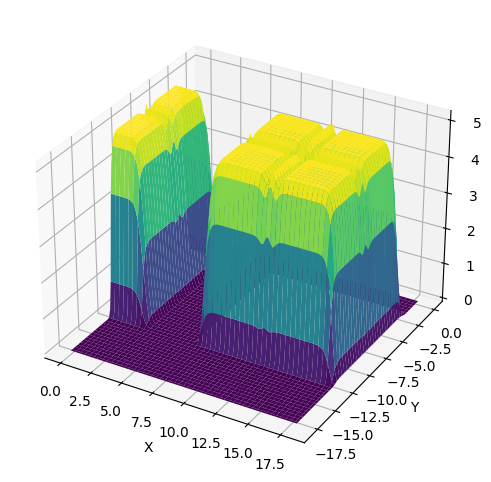

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y, xc, yc, p=10, s=1, a=1):
    return a*np.exp(-((x-xc)**p + (y-yc)**p)/((2.0*s)**p))

# Creazione della griglia di punti
x = np.linspace(0, 18, 100)
y = np.linspace(0, -18, 100)
x, y = np.meshgrid(x, y)
pp = 10
ss = 1.3
aa=5
z = f(x, y, 12, -12, p=pp, s=ss, a=aa)
z += f(x, y, 16, -12, p=pp, s=ss, a=aa)
z += f(x, y, 4, -12, p=pp, s=ss, a=aa)
z += f(x, y, 0, -12, p=pp, s=ss, a=aa)
z += f(x, y, 12, -8, p=pp, s=ss, a=aa)
z += f(x, y, 16, -8, p=pp, s=ss, a=aa)
z += f(x, y, 4, -8, p=pp, s=ss, a=aa)
z += f(x, y, 0, -8, p=pp, s=ss, a=aa)

# z = f(x, y, 10, -10, p=pp, s=ss, a=aa)
# z += f(x, y, 15, -10, p=pp, s=ss, a=aa)
# z += f(x, y, 0, -10, p=pp, s=ss, a=aa)
# z += f(x, y, 10, -5, p=pp, s=ss, a=aa)
# z += f(x, y, 15, -5, p=pp, s=ss, a=aa)
# z += f(x, y, 0, -5, p=pp, s=ss, a=aa)

# Creazione della figura
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot della superficie
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [5]:
import numpy as np
from scipy.spatial import Voronoi
import matplotlib.pyplot as plt

class VoronoiRegion:
    def __init__(self, region_id):
        self.id = region_id
        self.vertices = []
        self.is_inf = False
        self.point_inside = None

    def __str__(self):
        text = f'region id={self.id}'
        if self.point_inside:
            point_idx, point = self.point_inside
            text = f'{text}[point:{point}(point_id:{point_idx})]'
        text += ', vertices: '
        if self.is_inf:
            text += '(inf)'
        for v in self.vertices:
            text += f'{v}'
        return text

    def __repr__(self):
        return str(self)

    def add_vertex(self, vertex, vertices):
        if vertex == -1:
            self.is_inf = True
        else:
            point = vertices[vertex]
            self.vertices.append(point)

def voronoi_to_voronoi_regions(voronoi):
    voronoi_regions = []

    for i, point_region in enumerate(voronoi.point_region):
        region = voronoi.regions[point_region]
        vr = VoronoiRegion(point_region)
        for r in region:
            vr.add_vertex(r, voronoi.vertices)
        vr.point_inside = (i, voronoi.points[i])
        voronoi_regions.append(vr)
    return voronoi_regions


points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]])
vor = Voronoi(points)
regions = voronoi_to_voronoi_regions(vor)
for r in regions:
    print(r)

region id=1[point:[0. 0.](point_id:0)], vertices: (inf)[0.5 0.5]
region id=3[point:[0. 1.](point_id:1)], vertices: (inf)[0.5 1.5][0.5 0.5]
region id=2[point:[0. 2.](point_id:2)], vertices: (inf)[0.5 1.5]
region id=8[point:[1. 0.](point_id:3)], vertices: (inf)[1.5 0.5][0.5 0.5]
region id=7[point:[1. 1.](point_id:4)], vertices: [0.5 0.5][0.5 1.5][1.5 1.5][1.5 0.5]
region id=9[point:[1. 2.](point_id:5)], vertices: (inf)[1.5 1.5][0.5 1.5]
region id=6[point:[2. 0.](point_id:6)], vertices: (inf)[1.5 0.5]
region id=4[point:[2. 1.](point_id:7)], vertices: (inf)[1.5 1.5][1.5 0.5]
region id=5[point:[2. 2.](point_id:8)], vertices: (inf)[1.5 1.5]


Voronoi region for point 0 at [3.74540119 9.50714306]:
Number of edges: 4

Edge vectors:
Edge 0: [-17.75046202 -12.41088743]
Edge 1: [ 0.50622293 -1.89497311]
Edge 2: [4.07126705 2.00515388]
Edge 3: [13.17297203 12.30070666]


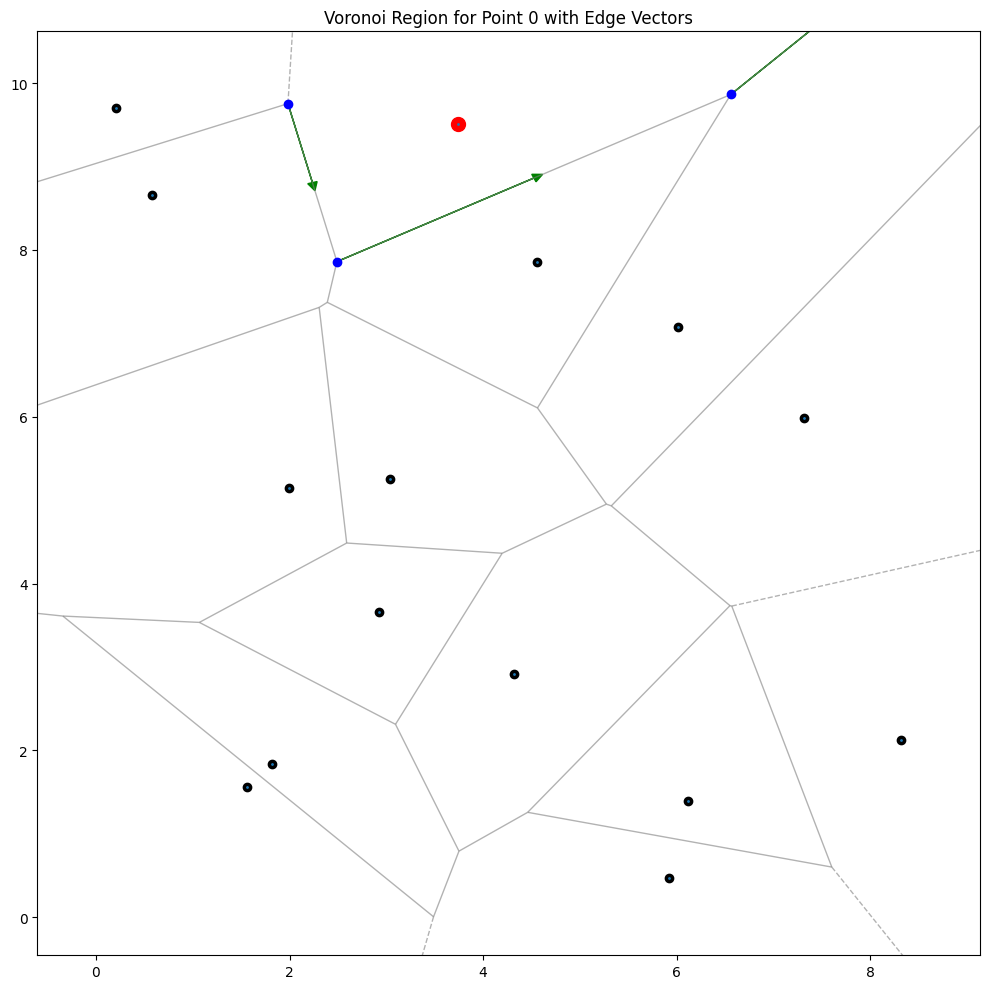

In [20]:
import numpy as np
from scipy.spatial import Voronoi
import matplotlib.pyplot as plt

def get_voronoi_edge_vectors(points, point_index):
    """
    Find all the vectors associated with the edges of the Voronoi region 
    for a specific point.
    
    Parameters:
    -----------
    points : array-like
        Array of points coordinates, shape (n_points, n_dimensions)
    point_index : int
        Index of the point whose Voronoi region we're analyzing
        
    Returns:
    --------
    edge_vectors : list
        List of vectors associated with the edges of the Voronoi region
    vertices : list
        List of vertices of the Voronoi region
    """
    # Compute Voronoi diagram
    vor = Voronoi(points)
    
    # Get the region associated with the specified point
    region_index = vor.point_region[point_index]
    region_vertices_indices = vor.regions[region_index]
    
    # Check if region is bounded
    if -1 in region_vertices_indices:
        print("Warning: The Voronoi region is unbounded")
    
    # Get the vertices coordinates
    vertices = [vor.vertices[i] for i in region_vertices_indices if i != -1]
    
    # Calculate edge vectors
    n_vertices = len(vertices)
    edge_vectors = []
    
    for i in range(n_vertices):
        # Calculate vector from current vertex to next vertex
        next_i = (i + 1) % n_vertices
        edge_vector = np.array(vertices[next_i]) - np.array(vertices[i])
        edge_vectors.append(edge_vector)
    
    return edge_vectors, vertices

def visualize_voronoi_edges(points, point_index, edge_vectors, vertices):
    """
    Visualize the Voronoi diagram, highlighting the region of interest
    and its edge vectors.
    """
    vor = Voronoi(points)
    
    # Plot Voronoi diagram
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot points
    ax.plot(points[:, 0], points[:, 1], 'ko')
    ax.plot(points[point_index, 0], points[point_index, 1], 'ro', markersize=10)
    
    # Plot Voronoi diagram
    from scipy.spatial import voronoi_plot_2d
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='gray', 
                   line_alpha=0.6, point_size=2)
    
    # Plot vertices and edges of the specific region
    vertices_array = np.array(vertices)
    ax.plot(vertices_array[:, 0], vertices_array[:, 1], 'bo', markersize=6)
    
    # Plot edge vectors
    for i, vector in enumerate(edge_vectors):
        start_point = vertices[i]
        # Scale vectors for better visualization
        scale = 0.5
        ax.arrow(start_point[0], start_point[1], 
                vector[0] * scale, vector[1] * scale, 
                head_width=0.1, head_length=0.1, fc='green', ec='green')
    
    ax.set_title(f'Voronoi Region for Point {point_index} with Edge Vectors')
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create some random points
    np.random.seed(42)
    points = np.random.rand(15, 2) * 10
    
    # Point of interest
    point_index = 0  # Change this to the index of your point of interest
    
    # Get edge vectors and vertices
    edge_vectors, vertices = get_voronoi_edge_vectors(points, point_index)
    
    # Print results
    print(f"Voronoi region for point {point_index} at {points[point_index]}:")
    print(f"Number of edges: {len(edge_vectors)}")
    print("\nEdge vectors:")
    for i, vector in enumerate(edge_vectors):
        print(f"Edge {i}: {vector}")
    
    # Visualize
    visualize_voronoi_edges(points, point_index, edge_vectors, vertices)


In [18]:
import numpy as np
from scipy.spatial import Voronoi

def get_voronoi_edges(points, point_idx):
    """
    Returns the edges of the Voronoi region for the point at index `point_idx`.
    
    Parameters:
        points (np.ndarray): Array of input points.
        point_idx (int): Index of the point whose Voronoi region edges are desired.
        
    Returns:
        list: List of edges. Each edge is a tuple:
            - ('segment', v1, v2) for finite edges between vertices v1 and v2.
            - ('ray', start, direction) for infinite edges starting at 'start' and extending in 'direction'.
    """
    vor = Voronoi(points)
    edges = []
    
    # Iterate through all ridges to find those adjacent to the point
    for ridge_idx, ridge_points in enumerate(vor.ridge_points):
        if point_idx in ridge_points:
            # Determine the other point in the ridge
            other_point = ridge_points[0] if ridge_points[1] == point_idx else ridge_points[1]
            ridge_vertices = vor.ridge_vertices[ridge_idx]
            
            if -1 in ridge_vertices:
                # Handle infinite edge
                finite_vertex = ridge_vertices[0] if ridge_vertices[0] != -1 else ridge_vertices[1]
                pi = vor.points[point_idx]
                pj = vor.points[other_point]
                
                # Calculate direction of the infinite ray
                tangent = pj - pi
                tangent_normalized = tangent / np.linalg.norm(tangent)
                normal = np.array([-tangent_normalized[1], tangent_normalized[0]])
                midpoint = (pi + pj) * 0.5
                direction = np.sign(np.dot(midpoint - vor.vertices[finite_vertex], normal)) * normal
                
                start = vor.vertices[finite_vertex]
                edges.append(('ray', start, direction))
            else:
                # Handle finite edge
                v1 = vor.vertices[ridge_vertices[0]]
                v2 = vor.vertices[ridge_vertices[1]]
                edges.append(('segment', v1, v2))
    
    return edges

# Example usage:
points = np.random.rand(10, 2)  # Replace with your points
point_i = 1  # Index of the point of interest
edges = get_voronoi_edges(points, point_i)

# Print the edges
for edge in edges:
    if edge[0] == 'segment':
        print(f"Finite segment between {edge[1]} and {edge[2]}")
    else:
        print(f"Infinite ray starting at {edge[1]} with direction {edge[2]}")

Infinite ray starting at [1.04624444 0.68082576] with direction [-0.93379613 -0.35780552]
Infinite ray starting at [0.48415829 0.6639221 ] with direction [-0.04062738  0.99917437]
Finite segment between [1.04624444 0.68082576] and [0.48952706 0.65822702]
Finite segment between [0.48952706 0.65822702] and [0.48415829 0.6639221 ]
